# Binary Classification

## Dataset

Come dataset di riferimento utilizziamo il MNIST: [dataset](./2_MNIST.ipynb).

#### Prendiamo un dataset del MNIST

In [ ]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1)

In [1]:
from sklearn import datasets
import numpy as np

mnist = datasets.load_digits()
mnist['target'] = mnist['target'].astype(np.int)

In [2]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = mnist.data
y = mnist.target

In [5]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3)

In [6]:
"abbiamo {} records di training e {} records di test".format(str(len(X_train)),str(len(X_test)))

'abbiamo 1437 records di training e 360 records di test'

# Binary Classifier

Le classi che troviamo in y sono i numeri da 0 a 9

Come primo step affrontiamo il problema in maniera binaria:

dato un numero vogliamo essere in grado di dire se è un 5 o non è un 5

In [25]:
y_train_5 = (y_train == 5) #se y_train = 5 metti True, se y_train != 5 metti False
y_test_5 = (y_test == 5)

In [26]:
y_train_5 = y_train_5.astype(np.int)
y_test_5 = y_test_5.astype(np.int)

In [27]:
np.unique(y_train_5)

array([0, 1])

In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Ora che i dati sono pronti, facciamo training!

## Support Vector Machines

[Support Vector Machines](./4_BinarySupportVectorMachine.ipynb)

In [29]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train_5)


SVC()

In [31]:
svm_clf.predict([X_train[10]])



array([0])

#### DOMANDA: 
* dato l'elemento X_train[10], a quale classe viene associato dal modello svm_clf? 
* la classe stimata corrisponde alla classe vera?

## Accuracy

#### Come **misuriamo** se il nostro algoritmo di classificazione è buono?

ESERCIZIO: [accuracy function](./3_Accuracy.ipynb).

### Accuracy Score

In [32]:
from sklearn.metrics import accuracy_score
y_pred = [0,1,1,1,1,0,1,0,1,0]
y_true = [1,1,0,1,1,0,0,0,1,0]
accuracy_score(y_true, y_pred)


0.7

In [33]:
y_pred_5 = svm_clf.predict(X_train)
accuracy_score(y_train_5, y_pred_5)

0.9986082115518441

## Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

#cv è il numero di sottoinsiemi in cui si vuole dividere X_train
#scoring specifica quale funzione si vuole usare per calcolare la bontà del modello

scores = cross_val_score(svm_clf, X_train, y_train_5, cv = 5, scoring = "accuracy")
print(scores)
print("Mean %0.5f"%scores.mean())
print("Standard Dev %0.5f"%scores.std())

[0.99652778 0.99652778 0.99651568 1.         0.99303136]
Mean 0.99652
Standard Dev 0.00220


In [35]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    #Il metodo fit non fa nulla
    def fit(self, X, y=None):
        return self
    
    #Il metodo predict genera un array di 0: qualsiasi X riceve in input la classifica come "non 5"
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=int)

In [36]:
never_5_classifier = Never5Classifier()
never_5_classifier.fit(X_train, y_train_5)
scores = cross_val_score(never_5_classifier, X_train, y_train_5, cv = 5, scoring = "accuracy")

In [37]:
print(scores)
print("Mean %0.5f"%scores.mean())
print("Standard Dev %0.5f"%scores.std())

[0.92708333 0.88194444 0.89547038 0.87456446 0.91986063]
Mean 0.89978
Standard Dev 0.02060


## Come mai abbiamo ottenuto un valore così alto?

L'accuratezza non è sempre il modo migliore per misurare le performance di un algoritmo di classificazione, soprattutto quando parliamo di *skewed datasets* (cioè quando una classe è molto più presente di un'altra).

## Confusion Matrix

L'idea è quella di contare quante volte i '5' sono stati interpretati come 'non 5' e quante volte i 'non 5' sono invece stati interpretati come '5'

Torniamo a considerare il caso:
 y_true = [1,1,0,1,1,0,0,0,1,0]
 y_pred = [0,1,1,1,1,0,1,0,1,0]


In [45]:
from sklearn.metrics import confusion_matrix

y_true = [1,1,0,1,1,0,0,0,1,0]
y_pred = [0,1,1,1,1,0,1,0,1,0]

confusion_matrix(y_true, y_pred)


array([[3, 2],
       [1, 4]], dtype=int64)

La definizione è la seguente: 

By definition a confusion matrix  is such that the element (i,j) is equal to the number of observations known to be in group  i and predicted to be in group j.

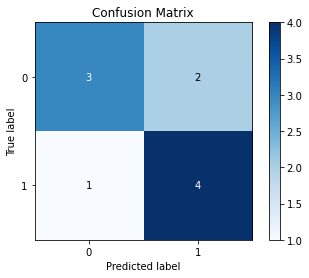

In [46]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true, y_pred)

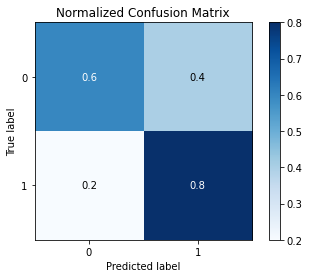

In [47]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)

Un classificatore perfetto genererà una *confusion matrix* con 1 sulla diagonale e 0 in tutti gli altri valori.

L'elemento (0,0) prende il nome di **True Negative**, mentre l'elemento (1,1) viene definito **True Positive**

Essendo che una confusion matrix ci restituisce tanti valori, vogliamo estrarre dei numeri che ci dicano se la stima è buona o meno.

Si dice **Precision** il numero di TP / (TP + FP) = 4 / (4 + 2) = 2/3 = 0.66666

La *Precision* si calcola rispetto alla seconda colonna: abbiamo detto che sei foto erano '5' in realtà erano solo 4.

Il problema della precision è che non ci dice nulla sui falsi negativi:
    

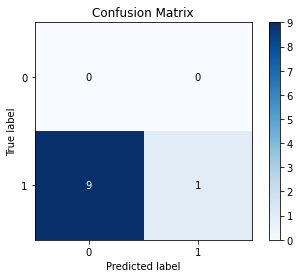

In [48]:
y_pred = [1,0,0,0,0,0,0,0,0,0]
y_true = [1,1,1,1,1,1,1,1,1,1]

skplt.metrics.plot_confusion_matrix(y_true, y_pred)

L'unica volta che abbiamo predetto 1 abbiamo detto giusto: la precisione è massima: 1.
Però non stiamo considerando che per 9 volte abbiamo detto di avere 0 quando invece era 1!

Mentre si indica con **Sensitivity** o **Recall** il numero di TP/ (TP + FN) = 1/ (1 + 9) = 0.1

Torniamo al caso reale:

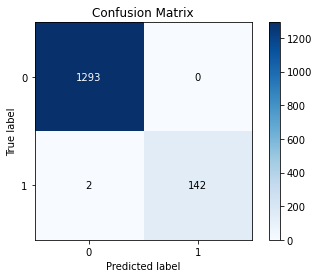

In [49]:
skplt.metrics.plot_confusion_matrix(y_train_5, y_pred_5)

Nel nostro caso:
    * Quando abbiamo predetto un 5, effettivamente era un 5 -> precision = 1
    * Per due volte abbiamo classificato un '5' come un 'non 5' -> recall = 142/146

In [50]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train_5, y_pred_5)
recall_score = recall_score(y_train_5, y_pred_5)
print('Precision Score: {} Recall Score {}'.format(precision_score,recall_score))

Precision Score: 1.0 Recall Score 0.9861111111111112


### Riassumendo:
dato un modello di classificazione binaria, per capire se il modello è buono si può procedere in due modi:
    * accuracy_score(y_train_5, y_pred_5)
    * skplt.metrics.plot_confusion_matrix(y_train_5, y_pred_5)
    * precision_score(y_train_5, y_pred_5)
    * recall_score(y_train_5, y_pred_5)
  
Nota che nella cross_val_score lo scoring non deve per forza essere accuracy, anche precision, recall,balanced_accuracy,... sono accettati (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) 

ESERCIZIO: considera sempre il dataset load_digits(): utilizzando il SVC() scrivi un modello che sia in grado di distinguere tra i numeri '1' e tutti gli altri. 
* Calcola la cross_val_score per l'accuracy
* Calcola la confusion_matrix;
* Calcola la precision;
* Calcola la recall;

[soluzione](./soluzione/1vsRest.ipynb)

In [51]:
from sklearn import datasets
import numpy as np

mnist = datasets.load_digits()
mnist['target'] = mnist['target'].astype(np.int)

In [52]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [53]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [54]:
X = mnist.data
y = mnist.target

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3)

In [56]:
"abbiamo {} records di training e {} records di test".format(str(len(X_train)),str(len(X_test)))

'abbiamo 1437 records di training e 360 records di test'

In [58]:
y_train_1 = (y_train == 1) 
y_test_1 = (y_test == 1)

In [59]:
y_train_1 = y_train_1.astype(np.int)
y_test_1 = y_test_1.astype(np.int)

In [60]:
np.unique(y_train_1)

array([0, 1])

In [61]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train_1)

svm_clf.predict([X_train[10]])


array([0])

In [65]:
from sklearn.metrics import accuracy_score
y_pred = [0,1,1,1,1,0,1,0,1,0]
y_true = [1,1,0,1,1,0,0,0,1,0]
accuracy_score(y_true, y_pred)


0.7

In [66]:
y_pred_1 = svm_clf.predict(X_train)
accuracy_score(y_train_1, y_pred_1)

0.9986082115518441

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_train, y_train_1, cv = 8, scoring = "accuracy")
print(scores)
print("Mean %0.5f"%scores.mean())
print("Standard Dev %0.5f"%scores.std())

[0.98888889 1.         1.         1.         0.98888889 1.
 1.         1.        ]
Mean 0.99722
Standard Dev 0.00481


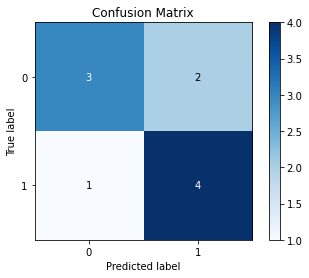

In [68]:
from sklearn.metrics import confusion_matrix

y_true = [1,1,0,1,1,0,0,0,1,0]
y_pred = [0,1,1,1,1,0,1,0,1,0]

confusion_matrix(y_true, y_pred)

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true, y_pred)


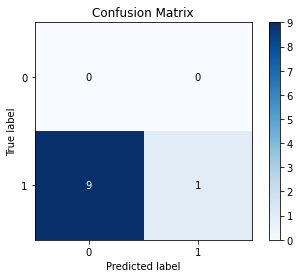

In [69]:
y_pred = [1,0,0,0,0,0,0,0,0,0]
y_true = [1,1,1,1,1,1,1,1,1,1]

skplt.metrics.plot_confusion_matrix(y_true, y_pred)

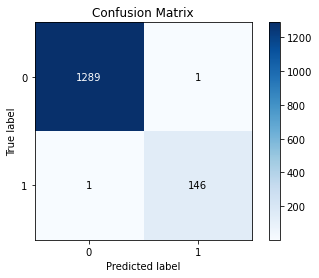

In [70]:
skplt.metrics.plot_confusion_matrix(y_train_1, y_pred_1)

In [71]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train_1, y_pred_1)
recall_score = recall_score(y_train_1, y_pred_1)
print('Precision Score: {} Recall Score {}'.format(precision_score,recall_score))

Precision Score: 0.9931972789115646 Recall Score 0.9931972789115646
